IMPORTING LIBRARIES

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure 

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20,12)  #adjusts the configuration of the plots we will create

READING THE DATASET

In [2]:
df = pd.read_csv('movies.csv')

In [3]:
#Display the entire dataset

pd.set_option('display.max_rows', None)

In [4]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


CLEANING / EDA

In [5]:
#Checking for missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%


In [6]:
#Checking data types for the columns

df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [7]:
#Assigning proper data types

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [8]:
#As release data and release year are not similar in some cases, making a new column with correct entries

df['release year'] = df['released'].str[:4]

In [9]:
df.head()
df.shape

(6820, 16)

In [10]:
#Dropping duplicates

df['name'] = df['name'].drop_duplicates()

In [11]:
df.shape

(6820, 16)

In [12]:
#ordering by gross revenue

df = df.sort_values(by= ['gross'], inplace = False, ascending = False)

ANALYSIS AND VISUALIZATION

In [13]:
#checking correlation (only works on numerical fields)
#Correlation methods: pearson, kendall, spearman
df.corr(method = 'pearson')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


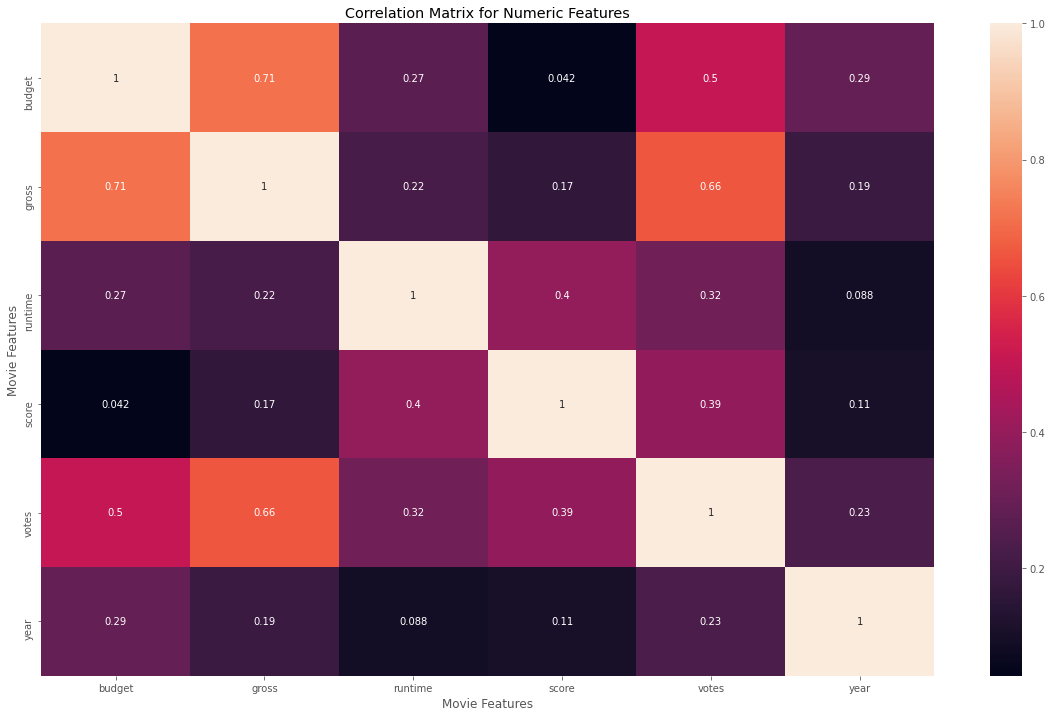

In [14]:
#visualizing the correlation matrix with just numeric values

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot= True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [15]:
#Converting all columns to numerical values so that correlation can be measured using visualization

df_num = df

for col_name in df_num.columns:
    if df_num[col_name].dtype == 'object':
        df_num[col_name] = df_num[col_name].astype('category')
        df_num[col_name] = df_num[col_name].cat.codes

df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,release year
6380,245000000,1428,54,1037,0,936662225,4679,7,2290,136,8.1,475,687192,2356,2015,29
5061,237000000,2062,53,1066,0,760507625,501,7,1800,162,7.8,2084,954412,1629,2009,23
2420,200000000,2062,54,1066,6,658672302,6177,7,910,194,7.8,1444,862554,1629,1997,11
6391,150000000,2085,54,466,0,652270625,2721,7,2247,124,7.0,404,469200,3310,2015,29
5723,220000000,1491,54,1412,0,623357910,-1,7,1987,143,8.1,2001,1064633,2145,2012,26


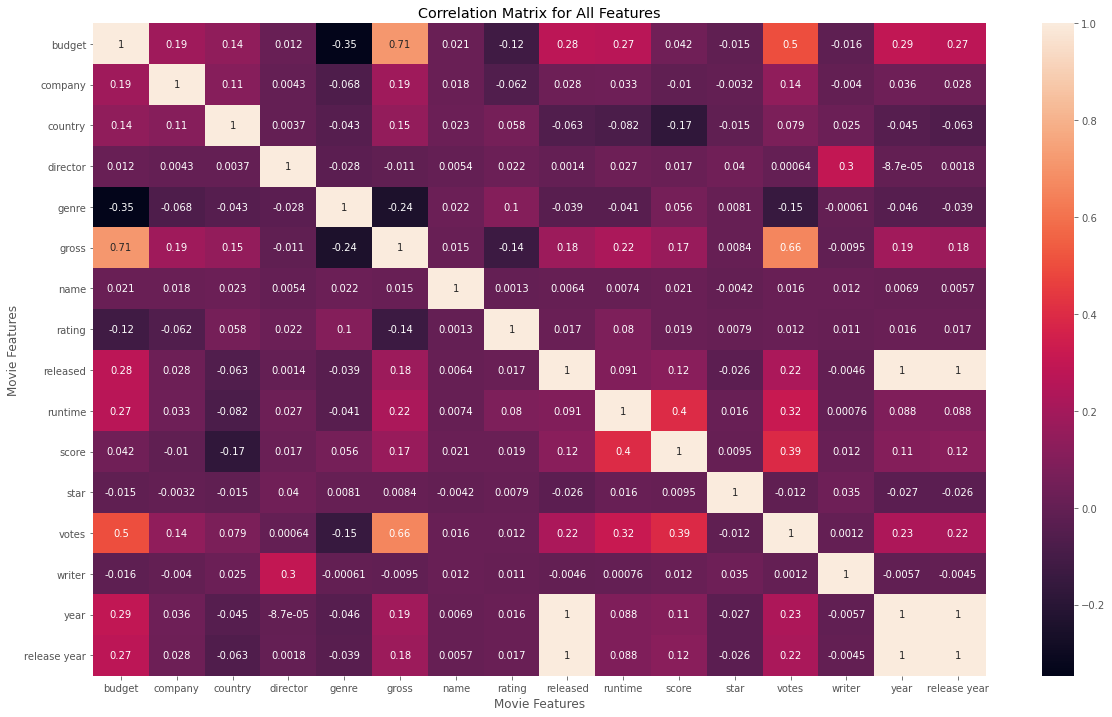

In [16]:
#Visualizing correlation matrix with all features

correlation_matrix = df_num.corr()
sns.heatmap(correlation_matrix, annot= True)

plt.title('Correlation Matrix for All Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [17]:
correlation_matrix = df_num.corr()
corr_pairs = correlation_matrix.unstack()
corr_pairs

budget        budget          1.000000
              company         0.187205
              country         0.137635
              director        0.011602
              genre          -0.346794
              gross           0.712196
              name            0.021145
              rating         -0.119660
              released        0.276635
              runtime         0.268226
              score           0.042145
              star           -0.015062
              votes           0.503924
              writer         -0.015611
              year            0.291009
              release year    0.274820
company       budget          0.187205
              company         1.000000
              country         0.107950
              director        0.004320
              genre          -0.068330
              gross           0.187220
              name            0.017537
              rating         -0.062250
              released        0.027898
              runtime    

In [18]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre         budget         -0.346794
budget        genre          -0.346794
genre         gross          -0.242676
gross         genre          -0.242676
country       score          -0.174414
score         country        -0.174414
votes         genre          -0.150519
genre         votes          -0.150519
gross         rating         -0.135538
rating        gross          -0.135538
              budget         -0.119660
budget        rating         -0.119660
runtime       country        -0.081796
country       runtime        -0.081796
genre         company        -0.068330
company       genre          -0.068330
release year  country        -0.062707
country       release year   -0.062707
              released       -0.062609
released      country        -0.062609
company       rating         -0.062250
rating        company        -0.062250
year          genre          -0.046259
genre         year           -0.046259
country       year           -0.045204
year          country    

In [19]:
highly_correlated = sorted_pairs[(sorted_pairs) > 0.5]
highly_correlated

votes         budget          0.503924
budget        votes           0.503924
gross         votes           0.662457
votes         gross           0.662457
budget        gross           0.712196
gross         budget          0.712196
year          released        0.996187
released      year            0.996187
release year  year            0.996229
year          release year    0.996229
release year  released        0.999389
released      release year    0.999389
budget        budget          1.000000
writer        writer          1.000000
votes         votes           1.000000
star          star            1.000000
score         score           1.000000
runtime       runtime         1.000000
released      released        1.000000
rating        rating          1.000000
name          name            1.000000
gross         gross           1.000000
genre         genre           1.000000
director      director        1.000000
country       country         1.000000
company       company    

VOTES AND BUDGET HAVE THE HIGHEST CORRELATION

VISUALIZING

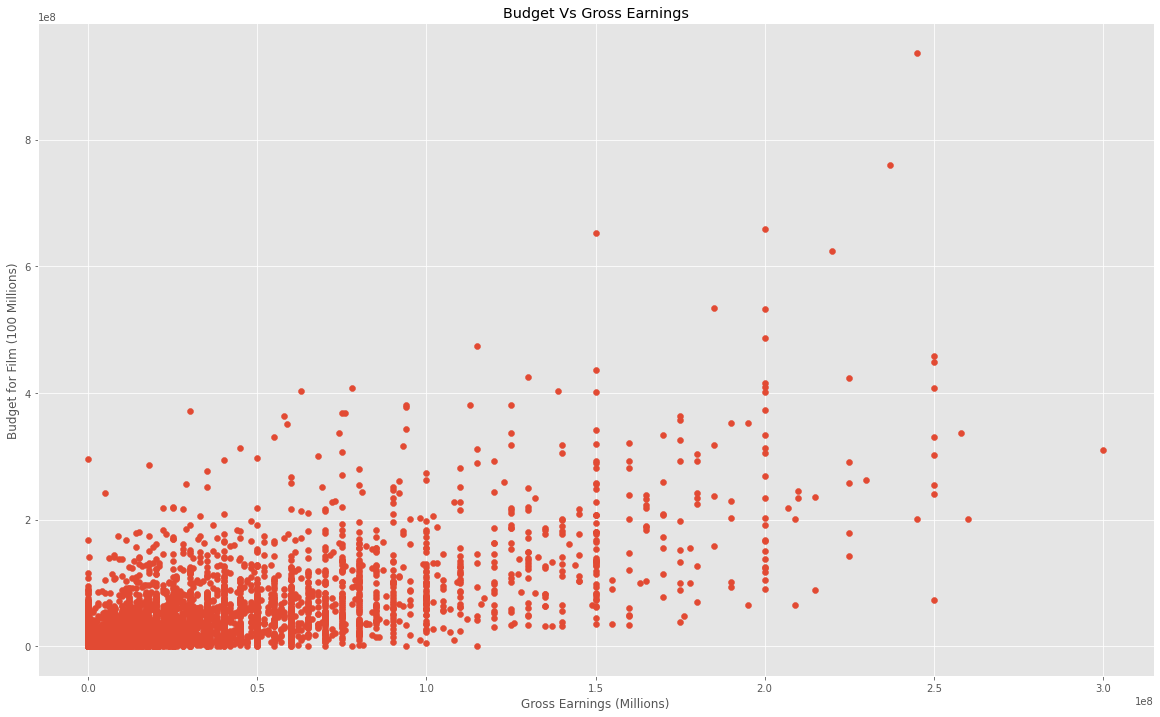

In [20]:
#Plotting a scatter plot

plt.scatter(x= df['budget'], y=df['gross'])
plt.title('Budget Vs Gross Earnings')
plt.xlabel('Gross Earnings (Millions)')
plt.ylabel('Budget for Film (100 Millions)')
plt.show()

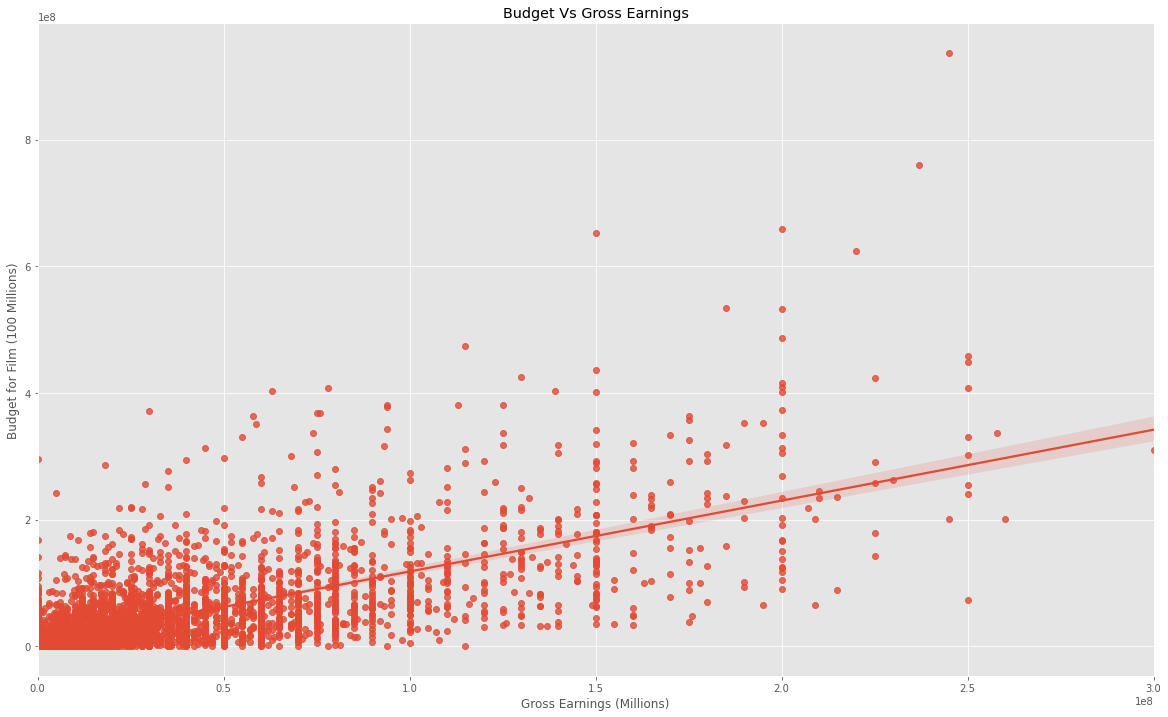

In [21]:
#Plot the budget vs gross using seaborn

sns.regplot(x= 'budget', y= 'gross', data=df)
plt.title('Budget Vs Gross Earnings')
plt.xlabel('Gross Earnings (Millions)')
plt.ylabel('Budget for Film (100 Millions)')
plt.show()

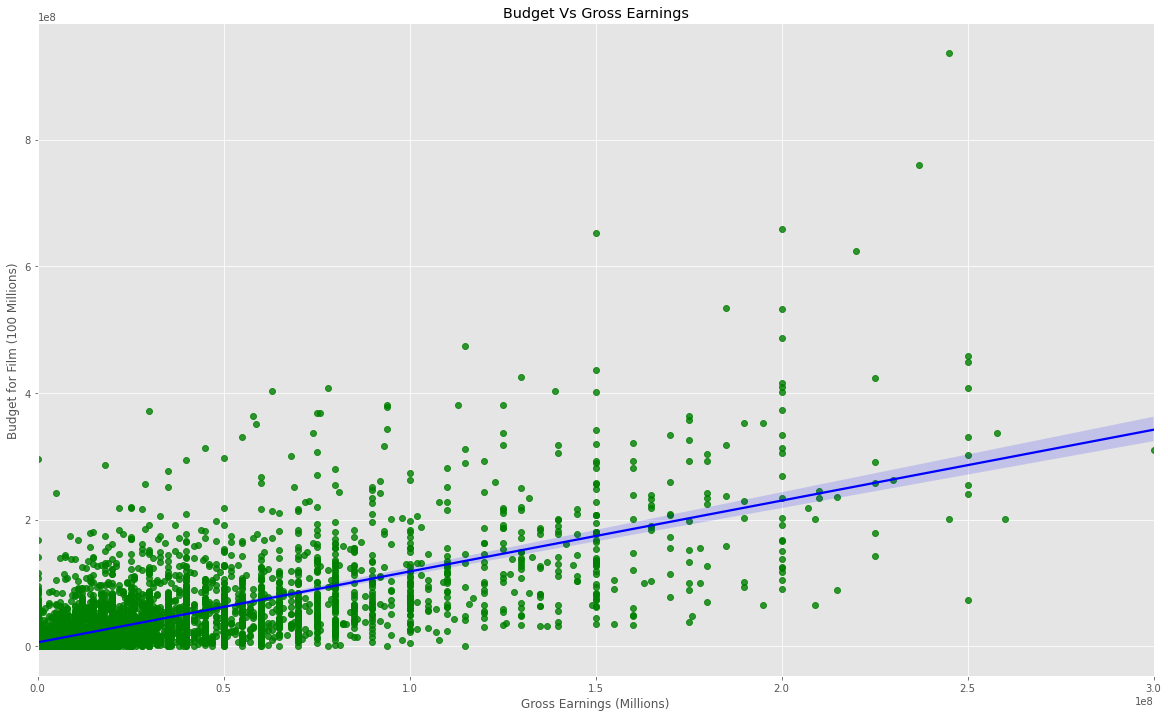

In [22]:
#Changing colors for better visualization

sns.regplot(x= 'budget', y= 'gross', data=df, scatter_kws={'color': 'green'}, line_kws={'color':'blue'})
plt.title('Budget Vs Gross Earnings')
plt.xlabel('Gross Earnings (Millions)')
plt.ylabel('Budget for Film (100 Millions)')
plt.show()

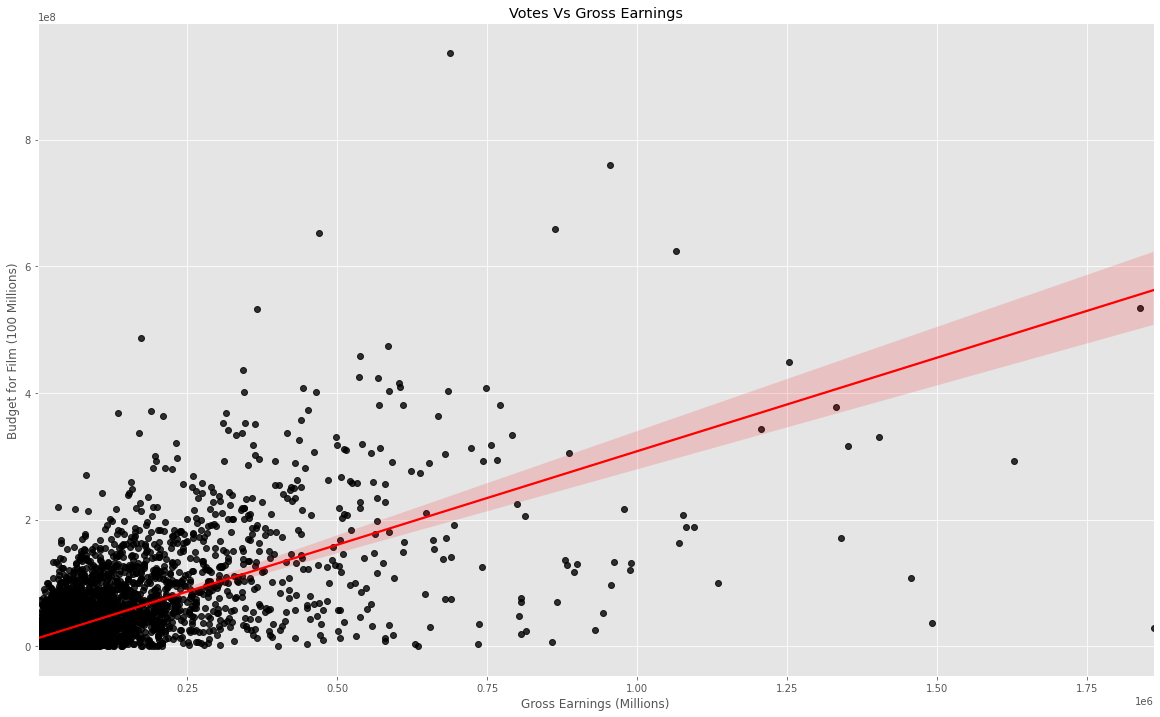

In [23]:
sns.regplot(x= 'votes', y= 'gross', data=df, scatter_kws={'color': 'black'}, line_kws={'color':'red'})
plt.title('Votes Vs Gross Earnings')
plt.xlabel('Gross Earnings (Millions)')
plt.ylabel('Budget for Film (100 Millions)')
plt.show()

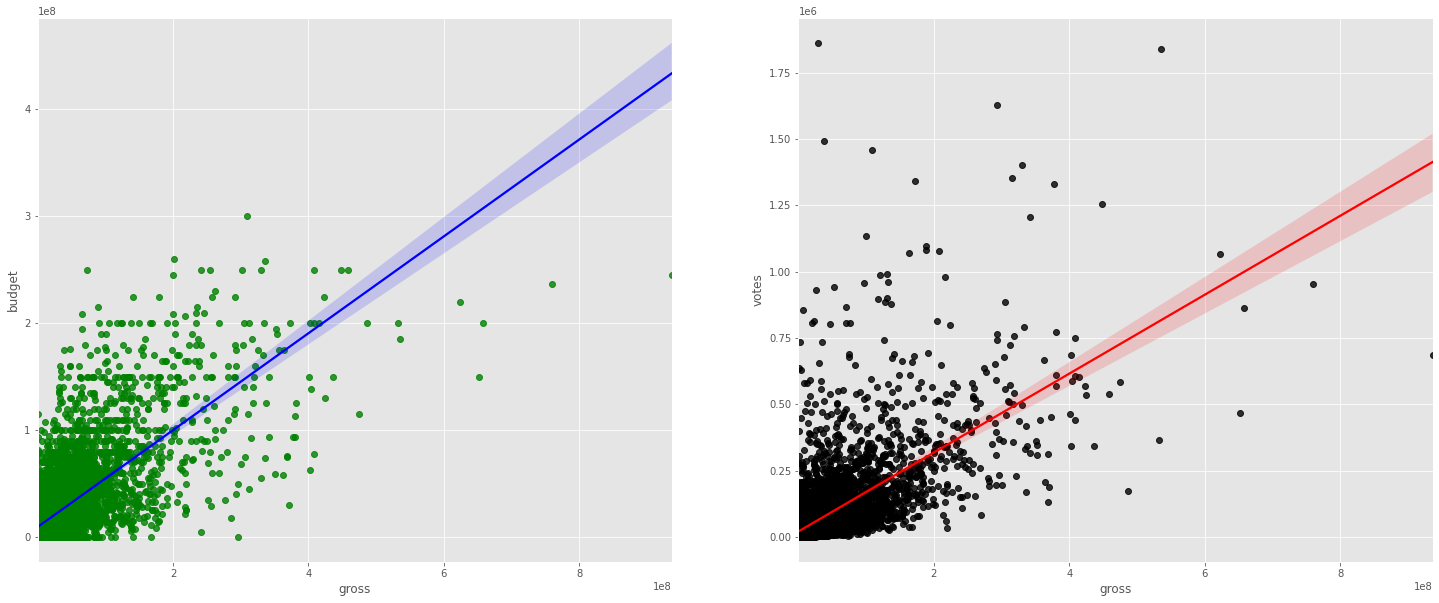

In [24]:
idx = df['gross']  # make an array of x-values

# call regplot on each axes
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False)
sns.regplot(x=idx, y=df['budget'], ax=ax1, scatter_kws={'color': 'green'}, line_kws={'color':'blue'})
sns.regplot(x=idx, y=df['votes'], ax=ax2, scatter_kws={'color': 'black'}, line_kws={'color':'red'})
fig.set_size_inches(25, 10)

In [25]:
#Votes and budget have highest correlations to gross earnings